# 4.1	Pandas包

#  4.1.1 series

#    1.创建

(1)列表创建

In [2]:
import pandas as pd
lst = [1,3,5,6,10,23]
s = pd.Series(lst)  ## 可以通过index指定索引，如果不指定索引，则会自动从0开始生成索引，我们叫做隐式索引
s

0     1
1     3
2     5
3     6
4    10
5    23
dtype: int64

In [ ]:
lst = [1,3,5,6,10,23]
s = pd.Series(lst,index=["A","B","C","D","E","F"]) # 通过index设置显式索引
s

(2)numpy创建

In [4]:
import numpy as np
s = pd.Series(np.random.randint(1,10,size=(3,)),index=['a','b','c'])
s        
#随机产生，每次执行结果不同。可多执行两次。

a    2
b    5
c    9
dtype: int32

(3)字典创建

In [ ]:
dic = {"A":1,"B":2,"C":3,"D":8}
s2 = pd.Series(dic)
s2

#  2.Series的索引和切片

因为Series只有一列，因此一般只对行进行操作，索引分为隐式索引和显示索引，因此不同的方式操作起来也不一样。

#    (1)Series隐式索引的操作

In [ ]:
lst = [1,3,5,6,10,23]
s = pd.Series(lst)
s

In [ ]:
s[2]   #取某一行，也可以说取某个元素

In [ ]:
s[[0,2,4]]   #取多行时，里面则是列表，可存储多个

In [ ]:
s[2:5] #切片操作

#    (2)Series显式索引的操作

In [ ]:
lst = [1,3,5,6,10,23]
s1 = pd.Series(lst,index=["A","B","C","D","E","F"])
s1

In [ ]:
s1["A"]   #取某行或单个元素

In [ ]:
s1[["A","B"]] # 取多行，可以是连续的，也可以是不连续的

In [ ]:
s1["A":"E"] #切片，取A行和B行，这里的B行是可以取到的，头和尾都可以取到
#s1["A":"D"] 

#   3.Series缺失值操作

查看Series中哪些是NaN
s.notnull() 不为空返回True，为空返回False
s.isnull() 不为空返回False，为空返回True

In [ ]:
s1 = pd.Series(lst,index=["A","B","C","D","E","F"])
dic = {"A":1,"B":2,"C":3,"D":2}
s1

In [ ]:
s2 = pd.Series(dic)
s2

In [ ]:
s3=s2+s1
s3

NaN，解释是：Not a Number

In [ ]:
s3.isnull()

In [ ]:
s3.notnull()

需求1：只显示不为空的行

In [ ]:
s3[s3.notnull()]

In [ ]:
s4=s3[s3.notnull()]
s4

需求2：只显示为空的行

In [ ]:
s3[s3.isnull()]

# 4.1.2 DataFrame

DataFrame是表格型数据结构，包含一组有序的列，每列可以是不同的值类型。DataFrame有行索引和列索引，可以看成由Series组成的字典。

DataFrame现在很火，已经有很多库都是基于DataFrame写的，而且它用起来也很方便，读excel只需要一行代码。
对于一个用python做数据处理的人来说，pandas是必须要了解的。
对于一个数据处理工具来说，读写是最基本的

#   1.创建DataFrame

（1）利用字典创建

https://blog.csdn.net/xtfge0915/article/details/52938740   

In [5]:
data={"one":np.random.randn(4),"two":np.linspace(1,4,4),"three":['zhangsan','李四',999,0.1]}
data

{'one': array([-0.05812759, -0.01309208, -1.89926834,  0.19281711]),
 'two': array([1., 2., 3., 4.]),
 'three': ['zhangsan', '李四', 999, 0.1]}

In [6]:
df=pd.DataFrame(data,index=[1,2,3,4])
df

,one,two,three
1,-0.058128,1.0,zhangsan
2,-0.013092,2.0,李四
3,-1.899268,3.0,999
4,0.192817,4.0,0.1


In [7]:
#如果创建df时不指定索引，默认索引将是从0开时，步长为1的数组。
df=pd.DataFrame(data)
df

,one,two,three
0,-0.058128,1.0,zhangsan
1,-0.013092,2.0,李四
2,-1.899268,3.0,999
3,0.192817,4.0,0.1


(2)利用数组创建

In [8]:
data=np.random.randn(6,4)#创建一个6行4列的数组
df=pd.DataFrame(data,columns=list('ABCD'),index=[1,2,'a','b','2006-10-1','第六行'])
df
#索引名一般不这样用，但是允许。

,A,B,C,D
1,-0.249744,0.787330,0.656442,-0.150261
2,1.272437,-0.353135,-0.888254,1.980048
a,0.166519,-1.634154,-1.235219,1.130061
b,-1.984392,-0.780563,-0.903962,0.439648
2006-10-1,-0.389264,0.159922,1.316325,-0.581921
第六行,-1.311448,0.717748,-0.713322,1.371948


(3)创建一个空DataFrame

In [ ]:
pd.DataFrame()

In [9]:
pd.DataFrame(columns=('id','name','grade','class'))

,id,name,grade,class


2024.9.27讲到这

#   2 读DataFrame

In [10]:
import pandas as pd
col_names=['No','banji','Math','English','Chinese']
data=pd.read_csv('chengji.csv',names=col_names)
data

,No,banji,Math,English,Chinese
0,3875,1,86.0,97,91
1,3876,1,90.0,95,82
2,3877,1,92.0,88,90
3,3878,1,76.0,92,84
4,3879,1,96.0,81,88
5,3880,2,64.0,72,68
6,3881,2,69.0,90,79
7,3882,2,81.0,68,74
8,3883,2,67.0,95,81
9,3884,2,66.0,86,76


常用操作
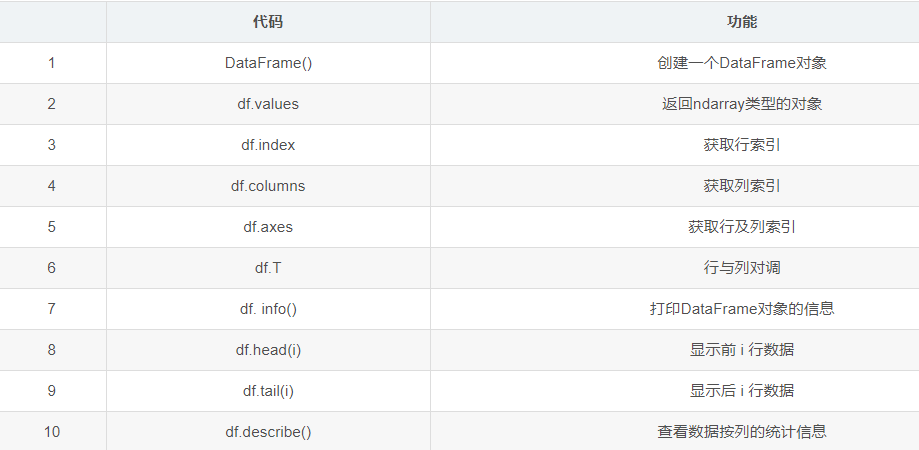

In [11]:
data.index   #查看索引（也称标签）

RangeIndex(start=0, stop=15, step=1)

In [12]:
data.columns

Index(['No', 'banji', 'Math', 'English', 'Chinese'], dtype='object')

(1)按行读取

方法1：.loc['行标签']or.loc[['行标签']]、.loc[['行标签1','行标签2','行标签n']]

In [13]:
data.loc[[5]]
#行标签（索引）是5

,No,banji,Math,English,Chinese
5,3880,2,64.0,72,68


方法2：.iloc[['行号1','行号2','行号n']]

In [14]:
data.iloc[[1,3,5,7]]
#查看多个标签

,No,banji,Math,English,Chinese
1,3876,1,90.0,95,82
3,3878,1,76.0,92,84
5,3880,2,64.0,72,68
7,3882,2,81.0,68,74


In [15]:
data.iloc[10:]

,No,banji,Math,English,Chinese
10,3885,3,76.0,93,84
11,3886,3,71.0,86,73
12,3887,3,70.0,78,74
13,3888,3,87.0,95,91
14,3889,3,78.0,76,77


In [16]:
data.iloc[1:5]

,No,banji,Math,English,Chinese
1,3876,1,90.0,95,82
2,3877,1,92.0,88,90
3,3878,1,76.0,92,84
4,3879,1,96.0,81,88


(2)按列读取

In [17]:
data1=data[1:4]    #为了方便，建立 一个新的dataFrame
data1

,No,banji,Math,English,Chinese
1,3876,1,90.0,95,82
2,3877,1,92.0,88,90
3,3878,1,76.0,92,84


data.列名      该方法每次只能读取一列

In [18]:
data1.Math

1    90.0
2    92.0
3    76.0
Name: Math, dtype: float64

方法2：df['列名']or df[['列名']]、df[['列名1','列名2','列名n']]

In [19]:
data1[['No','banji']]

,No,banji
1,3876,1
2,3877,1
3,3878,1


方法3 .iloc[:,colNo] or .iloc[:,colNo1:colNo2]
data.iloc[:,1]读取第一列
data.iloc[:,1:3]读取第1列到第3列
data.iloc[:,2:]读取第2列之后的数据
data.iloc[:,:3]读取前3列数据

In [20]:
data1.iloc[:,3]
#读取第3列数据

1    95
2    88
3    92
Name: English, dtype: int64

In [21]:
data1.iloc[:,2]
#读取第2列数据

1    90.0
2    92.0
3    76.0
Name: Math, dtype: float64

(3)按单元格读取

方法：data[col][row]

In [22]:
data['No'][2]

3877

#   3数据预览

(1)显示开始的5行和最后的5行

In [23]:
data.head()  #开始的5行

,No,banji,Math,English,Chinese
0,3875,1,86.0,97,91
1,3876,1,90.0,95,82
2,3877,1,92.0,88,90
3,3878,1,76.0,92,84
4,3879,1,96.0,81,88


In [24]:
data.tail()  #最后的5行

,No,banji,Math,English,Chinese
10,3885,3,76.0,93,84
11,3886,3,71.0,86,73
12,3887,3,70.0,78,74
13,3888,3,87.0,95,91
14,3889,3,78.0,76,77


（2）查看均值、方差、极值等统计值 

In [25]:
data.describe()

,No,banji,Math,English,Chinese
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3882.000000,2.000000,77.933333,86.133333,80.800000
std,4.472136,0.845154,10.284987,9.171903,7.193251
min,3875.000000,1.000000,64.000000,68.000000,68.000000
25%,3878.500000,1.000000,69.500000,79.500000,75.000000
50%,3882.000000,2.000000,76.000000,88.000000,81.000000
75%,3885.500000,3.000000,86.500000,94.000000,86.000000
max,3889.000000,3.000000,96.000000,97.000000,91.000000


In [26]:
data

,No,banji,Math,English,Chinese
0,3875,1,86.0,97,91
1,3876,1,90.0,95,82
2,3877,1,92.0,88,90
3,3878,1,76.0,92,84
4,3879,1,96.0,81,88
5,3880,2,64.0,72,68
6,3881,2,69.0,90,79
7,3882,2,81.0,68,74
8,3883,2,67.0,95,81
9,3884,2,66.0,86,76


In [ ]:
#2024
data['Chinese']

In [27]:
data['Chinese'].mean()

80.8

(3)排序

In [28]:
data.sort_values('English')

,No,banji,Math,English,Chinese
7,3882,2,81.0,68,74
5,3880,2,64.0,72,68
14,3889,3,78.0,76,77
12,3887,3,70.0,78,74
4,3879,1,96.0,81,88
9,3884,2,66.0,86,76
11,3886,3,71.0,86,73
2,3877,1,92.0,88,90
6,3881,2,69.0,90,79
3,3878,1,76.0,92,84


#   4.高级应用

DataFrame提供了高效的数据处理手段

可以进行分组，在分组结果的基础上的函数包括计数（count）、求和(sum）、均值（mean）、中位数(median)、方差（var）、标准差(std)、最大值（max）和最小值(min)

In [ ]:
data

In [29]:
data.groupby('banji').sum()   #按班级分组统计

,No,Math,English,Chinese
banji,,,,
1,19385,440.0,453,435
2,19410,347.0,411,378
3,19435,382.0,428,399


In [30]:
data.groupby('banji').mean()

,No,Math,English,Chinese
banji,,,,
1,3877.0,88.0,90.6,87.0
2,3882.0,69.4,82.2,75.6
3,3887.0,76.4,85.6,79.8


In [31]:
data.groupby('banji').std()

,No,Math,English,Chinese
banji,,,,
1,1.581139,7.615773,6.348228,3.872983
2,1.581139,6.730527,11.670476,5.029911
3,1.581139,6.804410,8.561542,7.596052


In [32]:
data.groupby('banji').max()

,No,Math,English,Chinese
banji,,,,
1,3879,96.0,97,91
2,3884,81.0,95,81
3,3889,87.0,95,91


2023.9.18讲到这

# 4.1.3	读入csv文件

一个更复杂的实际数据

In [33]:
#导入pandas库
import pandas as pd
#给每列数据赋予列名
col_names=['Hour','Minute','Second','u-second','Horiz_accel','vert_accel']
#读取数据

#data=pd.read_csv('acc_00001.csv',header=-1,names=col_names)
data=pd.read_csv('acc_00001.csv',names=col_names)
#显示读取的数据
data

,Hour,Minute,Second,u-second,Horiz_accel,vert_accel
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020
...,...,...,...,...,...,...
2555,9,39,39,165470.0,0.044,-0.094
2556,9,39,39,165510.0,-0.456,0.486
2557,9,39,39,165550.0,-0.885,-0.154
2558,9,39,39,165580.0,-0.230,-0.762


!pip install -U numpy

!pip install -U pandas

In [34]:
data.describe()

,Hour,Minute,Second,u-second,Horiz_accel,vert_accel
count,2560.0,2560.0,2560.0,2560.000000,2560.000000,2560.000000
mean,9.0,39.0,39.0,115643.941406,0.003465,-0.001881
std,0.0,0.0,0.0,28873.112470,0.561845,0.435883
min,9.0,39.0,39.0,65664.000000,-1.763000,-1.569000
25%,9.0,39.0,39.0,90654.000000,-0.383250,-0.300500
50%,9.0,39.0,39.0,115640.000000,0.002500,-0.007000
75%,9.0,39.0,39.0,140630.000000,0.383250,0.296000
max,9.0,39.0,39.0,165620.000000,2.010000,1.591000


#### 4.1.4	截取数据与描述数据

截取acc_00001.csv前5行数据输出结果如下图所示

In [35]:
#导入pandas库
import pandas as pd

#给每列数据赋予列名
col_names=['Hour','Minute','Second','u-second','Horiz_accel','vert_accel']
#读取数据
data=pd.read_csv('acc_00001.csv',names=col_names)
#显示截取数据的前5行
data1=data.head()
data1

,Hour,Minute,Second,u-second,Horiz_accel,vert_accel
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020


截取acc_00001.csv前15行数据输出结果如下图所示

In [36]:
#显示截取数据的前15行
data_15=data.head(15)
#显示前15行数据
data_15

,Hour,Minute,Second,u-second,Horiz_accel,vert_accel
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020
5,9,39,39,65859.0,-0.364,0.112
6,9,39,39,65898.0,0.326,0.296
7,9,39,39,65937.0,0.874,-0.366
8,9,39,39,65976.0,0.885,-0.369
9,9,39,39,66015.0,0.257,0.538


截取acc_00001.csv后5行数据输出结果如下图所示

In [37]:
#显示截取数据的后5行
data_last5=data.tail()
#显示后5行数据
data_last5

,Hour,Minute,Second,u-second,Horiz_accel,vert_accel
2555,9,39,39,165470.0,0.044,-0.094
2556,9,39,39,165510.0,-0.456,0.486
2557,9,39,39,165550.0,-0.885,-0.154
2558,9,39,39,165580.0,-0.230,-0.762
2559,9,39,39,165620.0,-0.134,0.541


截取acc_00001.csv后15行数据输出结果如下图所示

In [ ]:
#显示截取数据的后15行
data_last15=data.tail(15)
#显示后5行数据
data_last15

Pandas库中通过简便的方法统计数据的基本信息，包括计数、均值、标准差、最小值、前25%小的值的分界点、前50%小的值的分界点、前75%小的值的分界点、最大值。如下代码为显示acc_00001.csv文件的统计信息

In [ ]:
#获取数据的属性描述
data.describe()

如下代码显示了如何利用Pandas库显示每个属性对应的数据类型以及占用内存情况

In [38]:
#获取数据的类型和其它信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hour         2560 non-null   int64  
 1   Minute       2560 non-null   int64  
 2   Second       2560 non-null   int64  
 3   u-second     2560 non-null   float64
 4   Horiz_accel  2560 non-null   float64
 5   vert_accel   2560 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 120.1 KB


# 4.1.4	数据显示

如下通过代码示例讲述Pandas库如何对于多列数据趋势折线图可视化显示

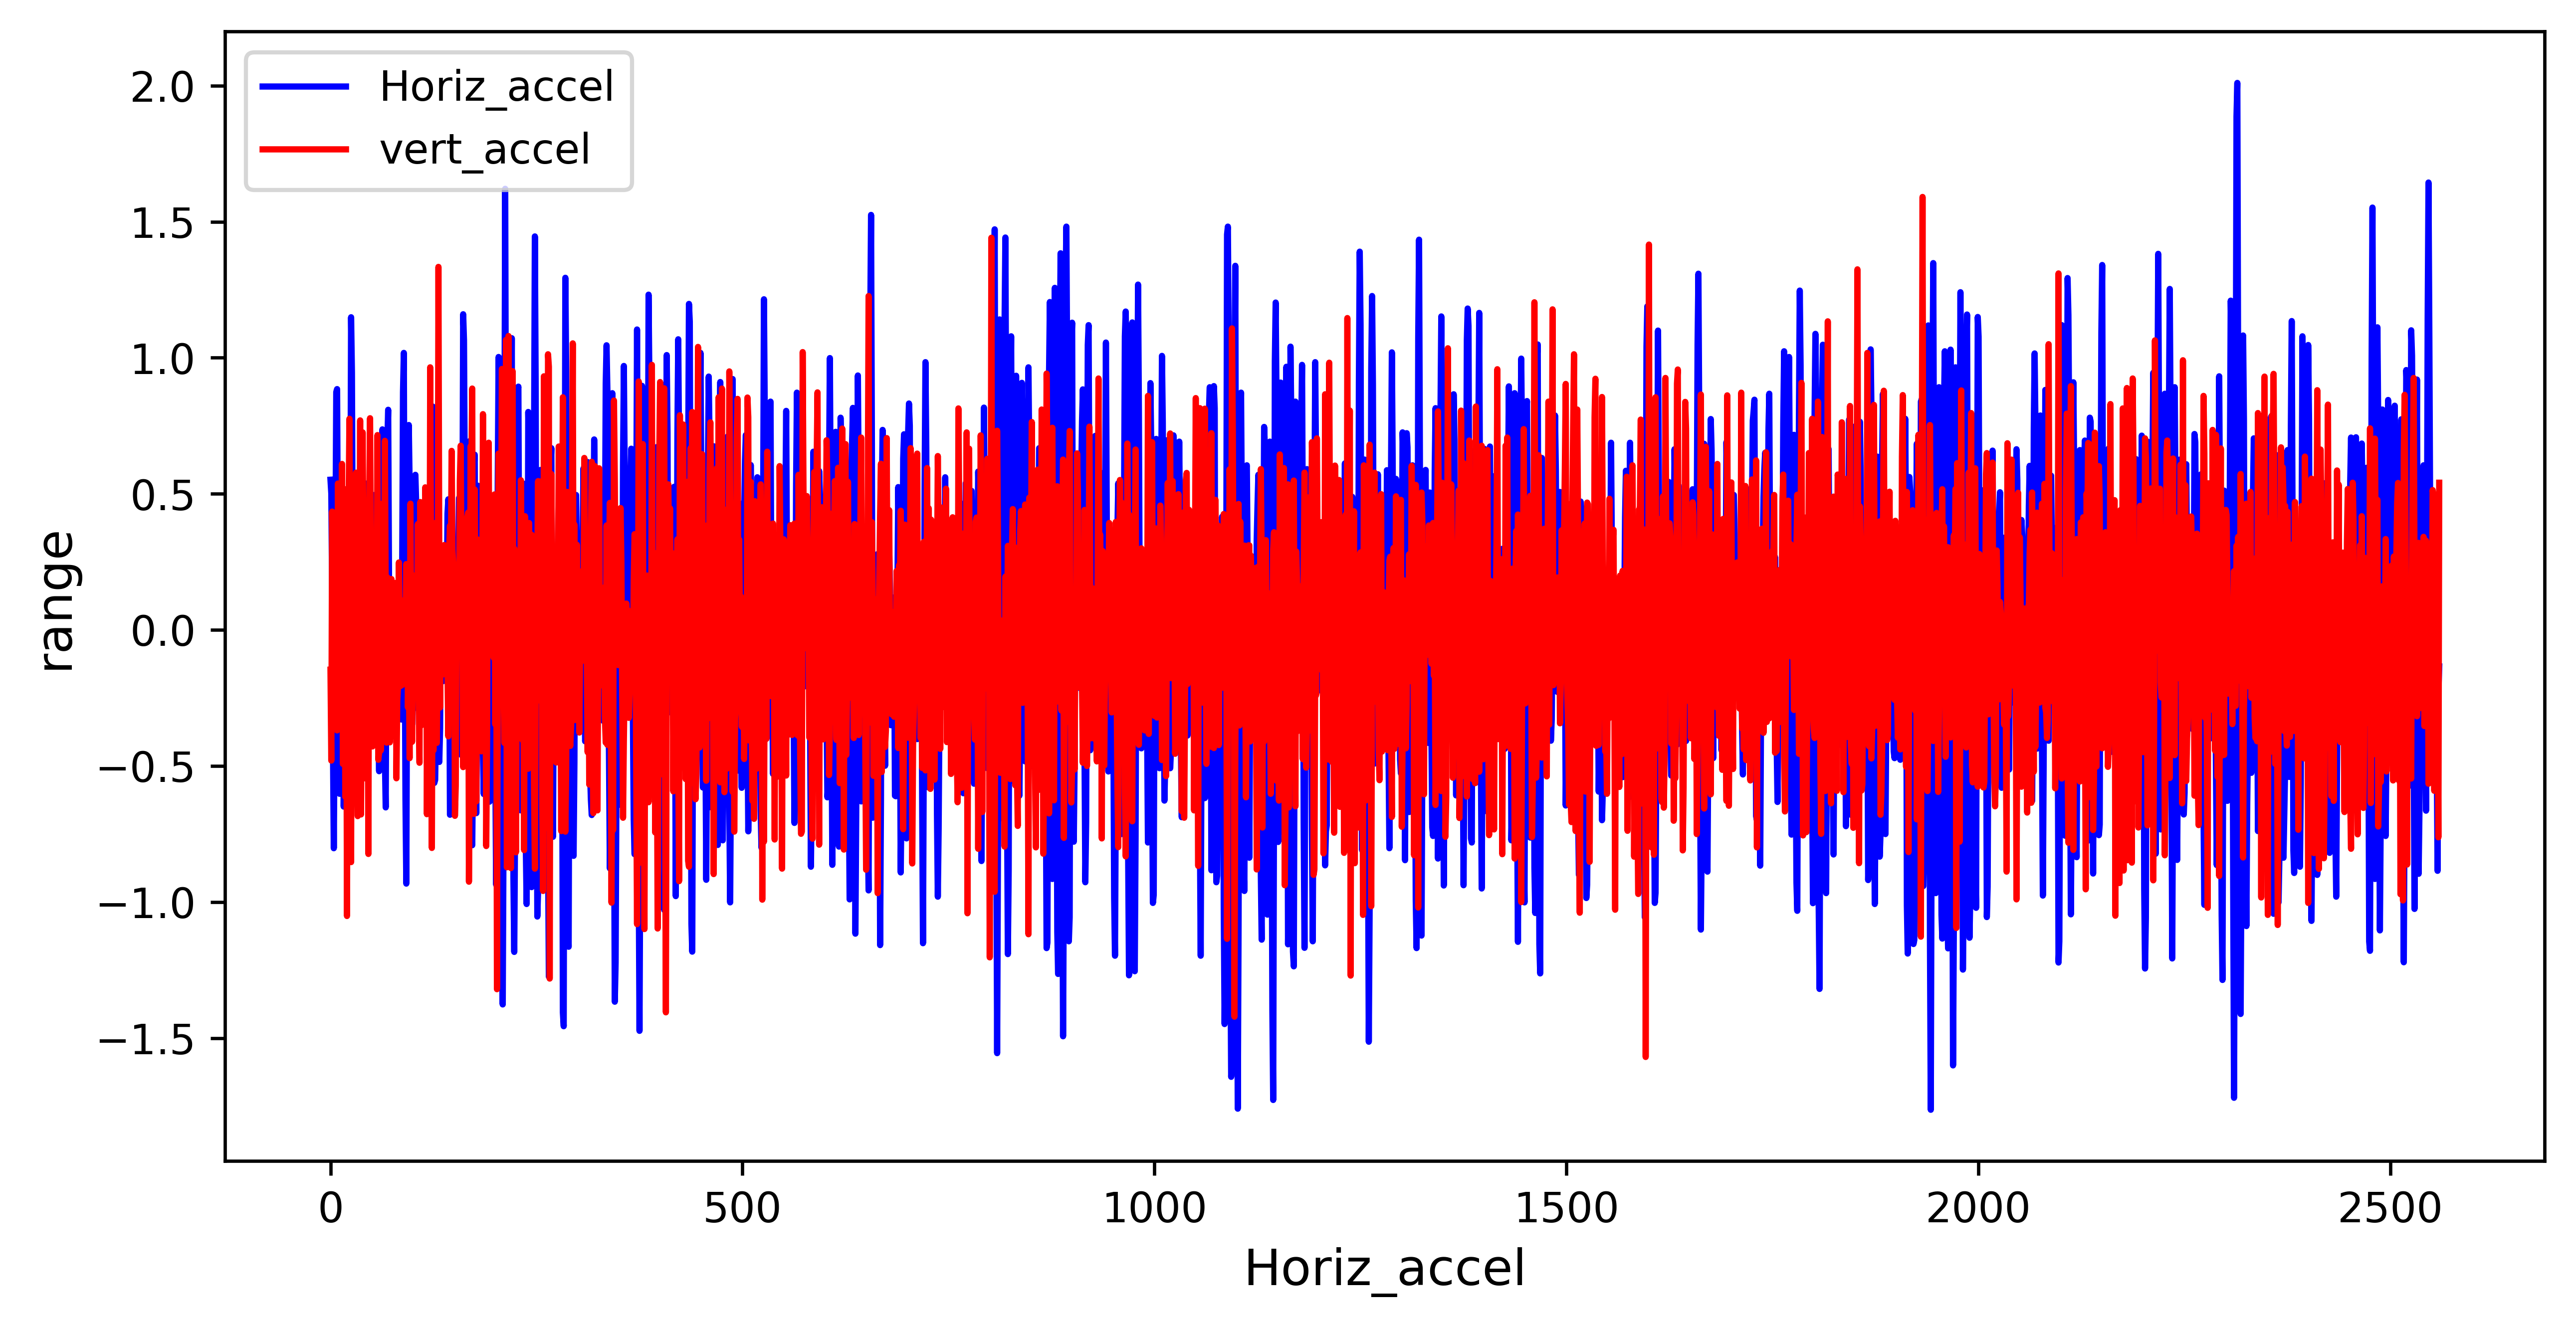

In [40]:
#导入可视化图库
import matplotlib.pyplot as plt

fig_verify = plt.figure(figsize=(10,5),dpi=600)
#读取Horiz_accel数据并显示
data.Horiz_accel.plot(kind='line',color='b',label='Horiz_accel')
#读取vert_accel数据并显示
data.vert_accel.plot(kind='line',color='r',label='vert_accel')
#分别显示横向、纵向加速度值。

#设置标签
plt.legend(loc='upper left')
#设置x轴坐标
plt.xlabel("Horiz_accel",fontsize=12)
#设置y轴坐标
plt.ylabel("range",fontsize=12)
#显示图像
plt.show()
#保存图像
#fig_verify.savefig("acc001.png")


如下通过代码示例讲述Pandas库如何对于acc_00001.csv直方图可视化显示

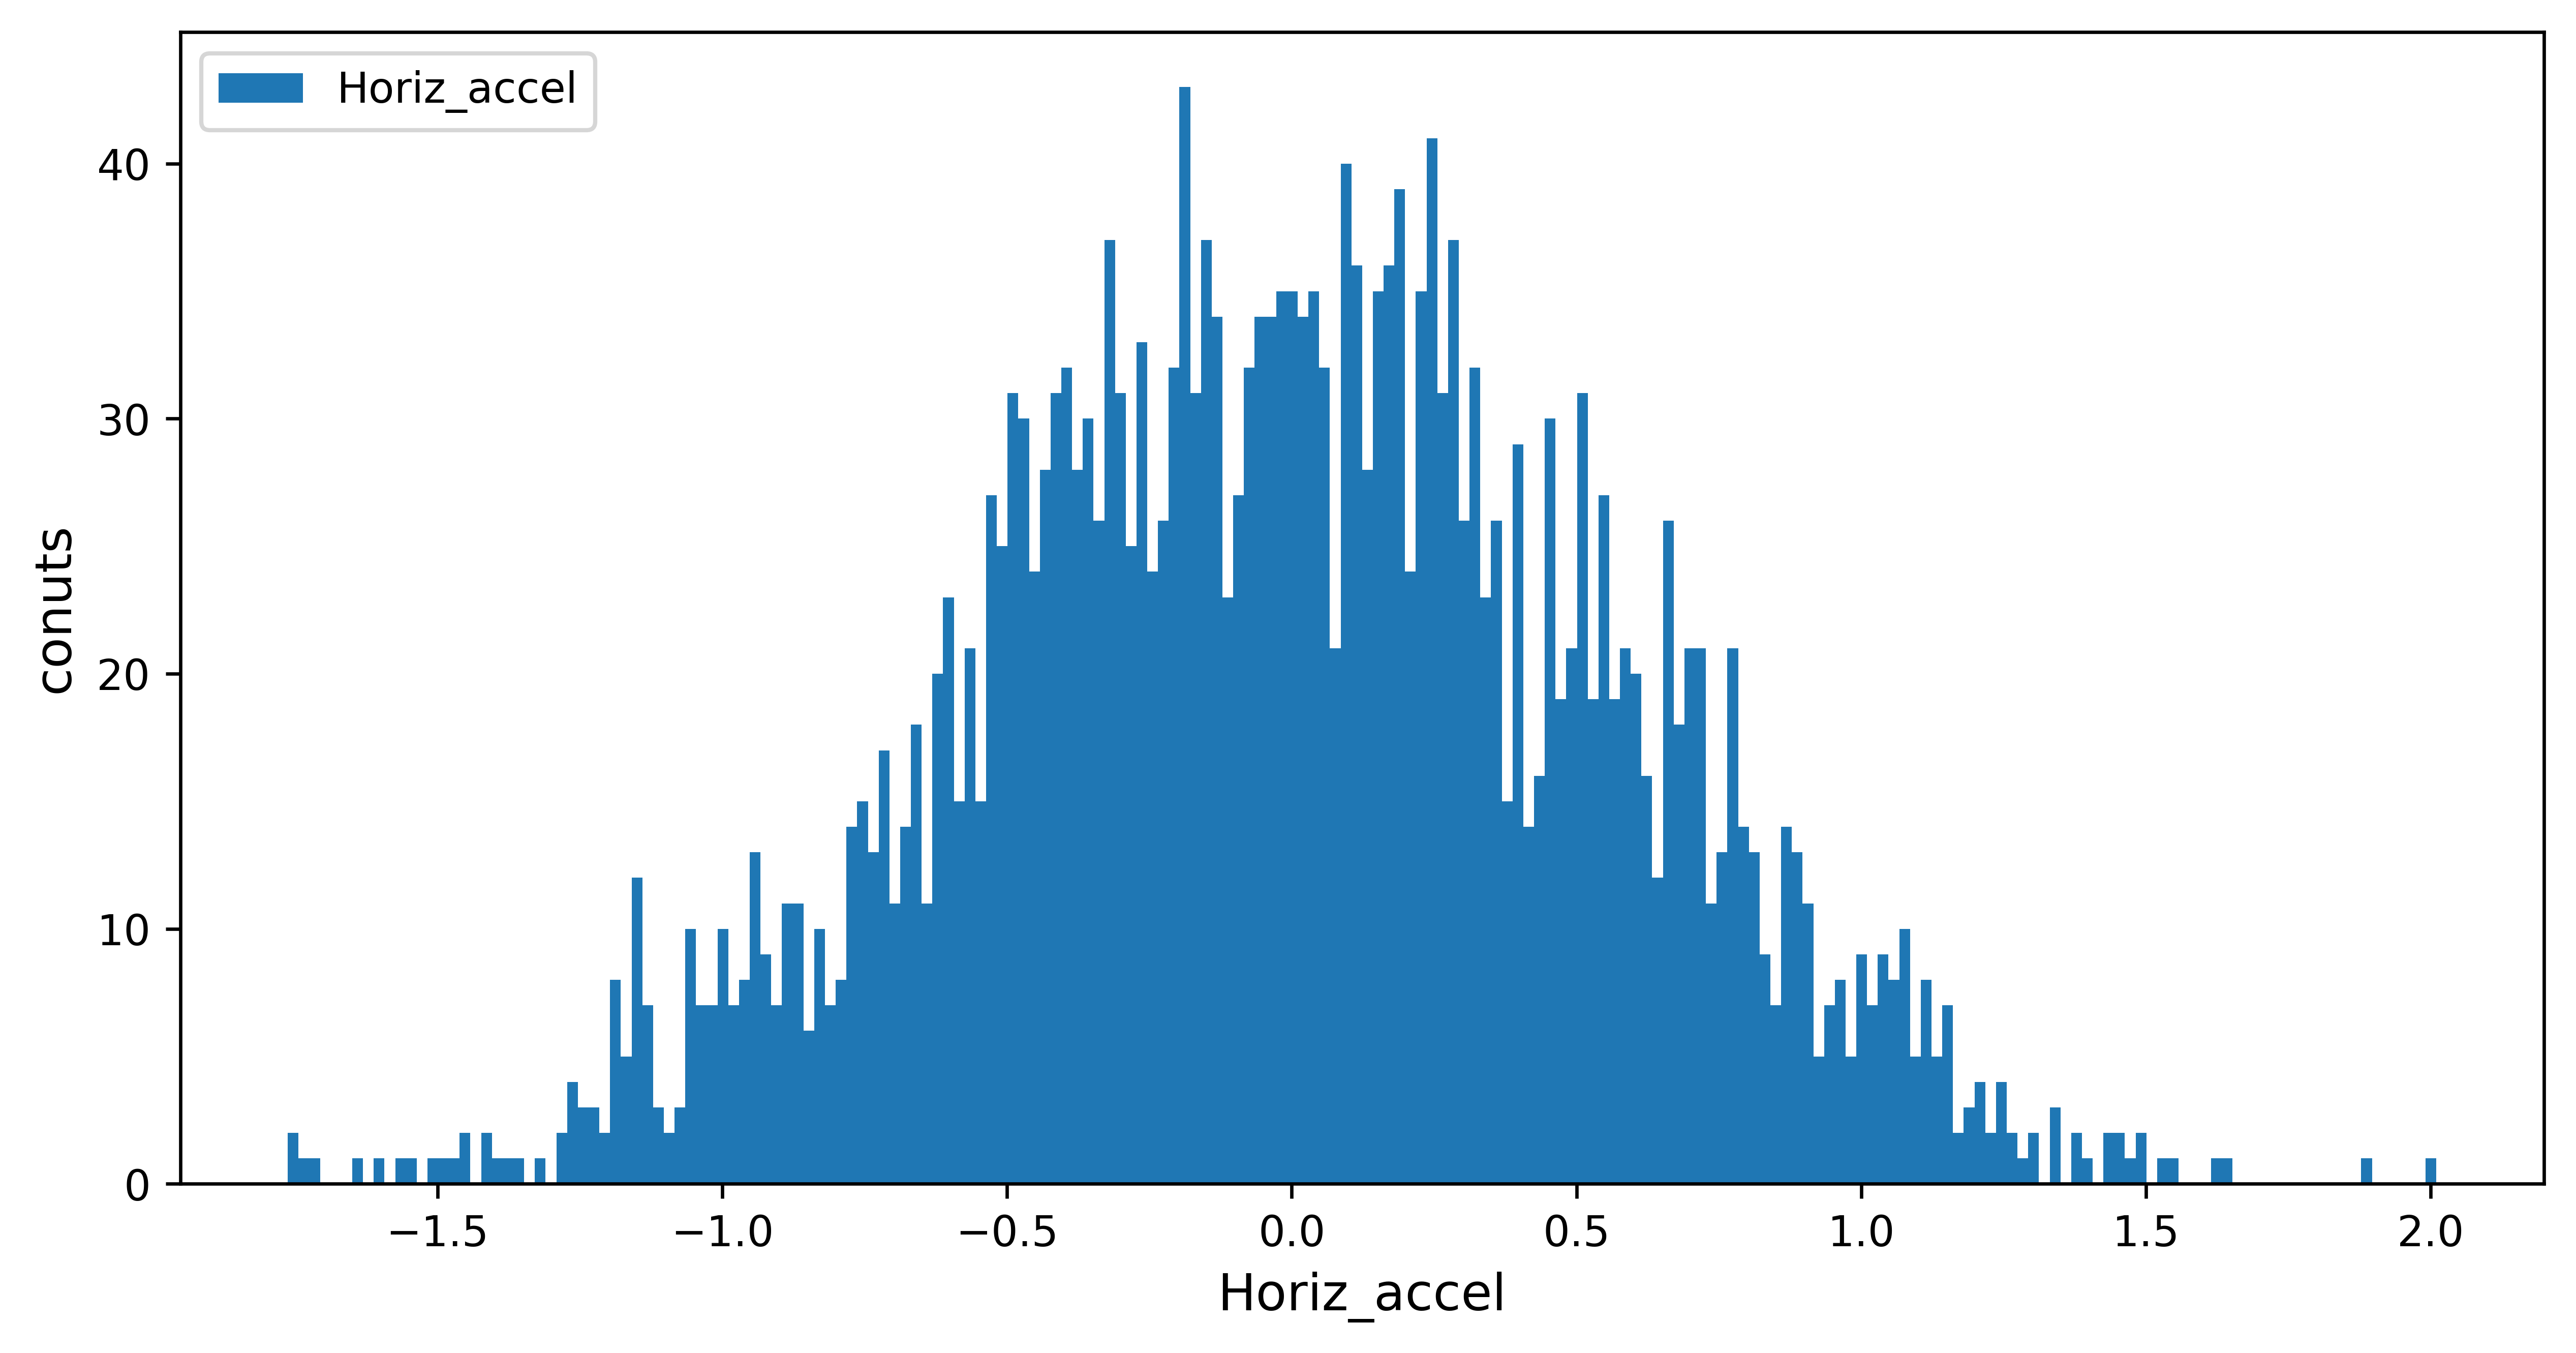

In [41]:
#导入可视化图库
import matplotlib.pyplot as plt

fig_verify = plt.figure(figsize=(10,5),dpi=600)
#读取Horiz_accel数据并显示
data.Horiz_accel.plot(kind='hist',bins=200)

#设置标签
plt.legend(loc='upper left')
#设置x轴坐标
plt.xlabel("Horiz_accel",fontsize=12)
#设置y轴坐标
plt.ylabel("conuts",fontsize=12)
#显示图像
plt.show()
#保存图像
fig_verify.savefig("acc002.png")

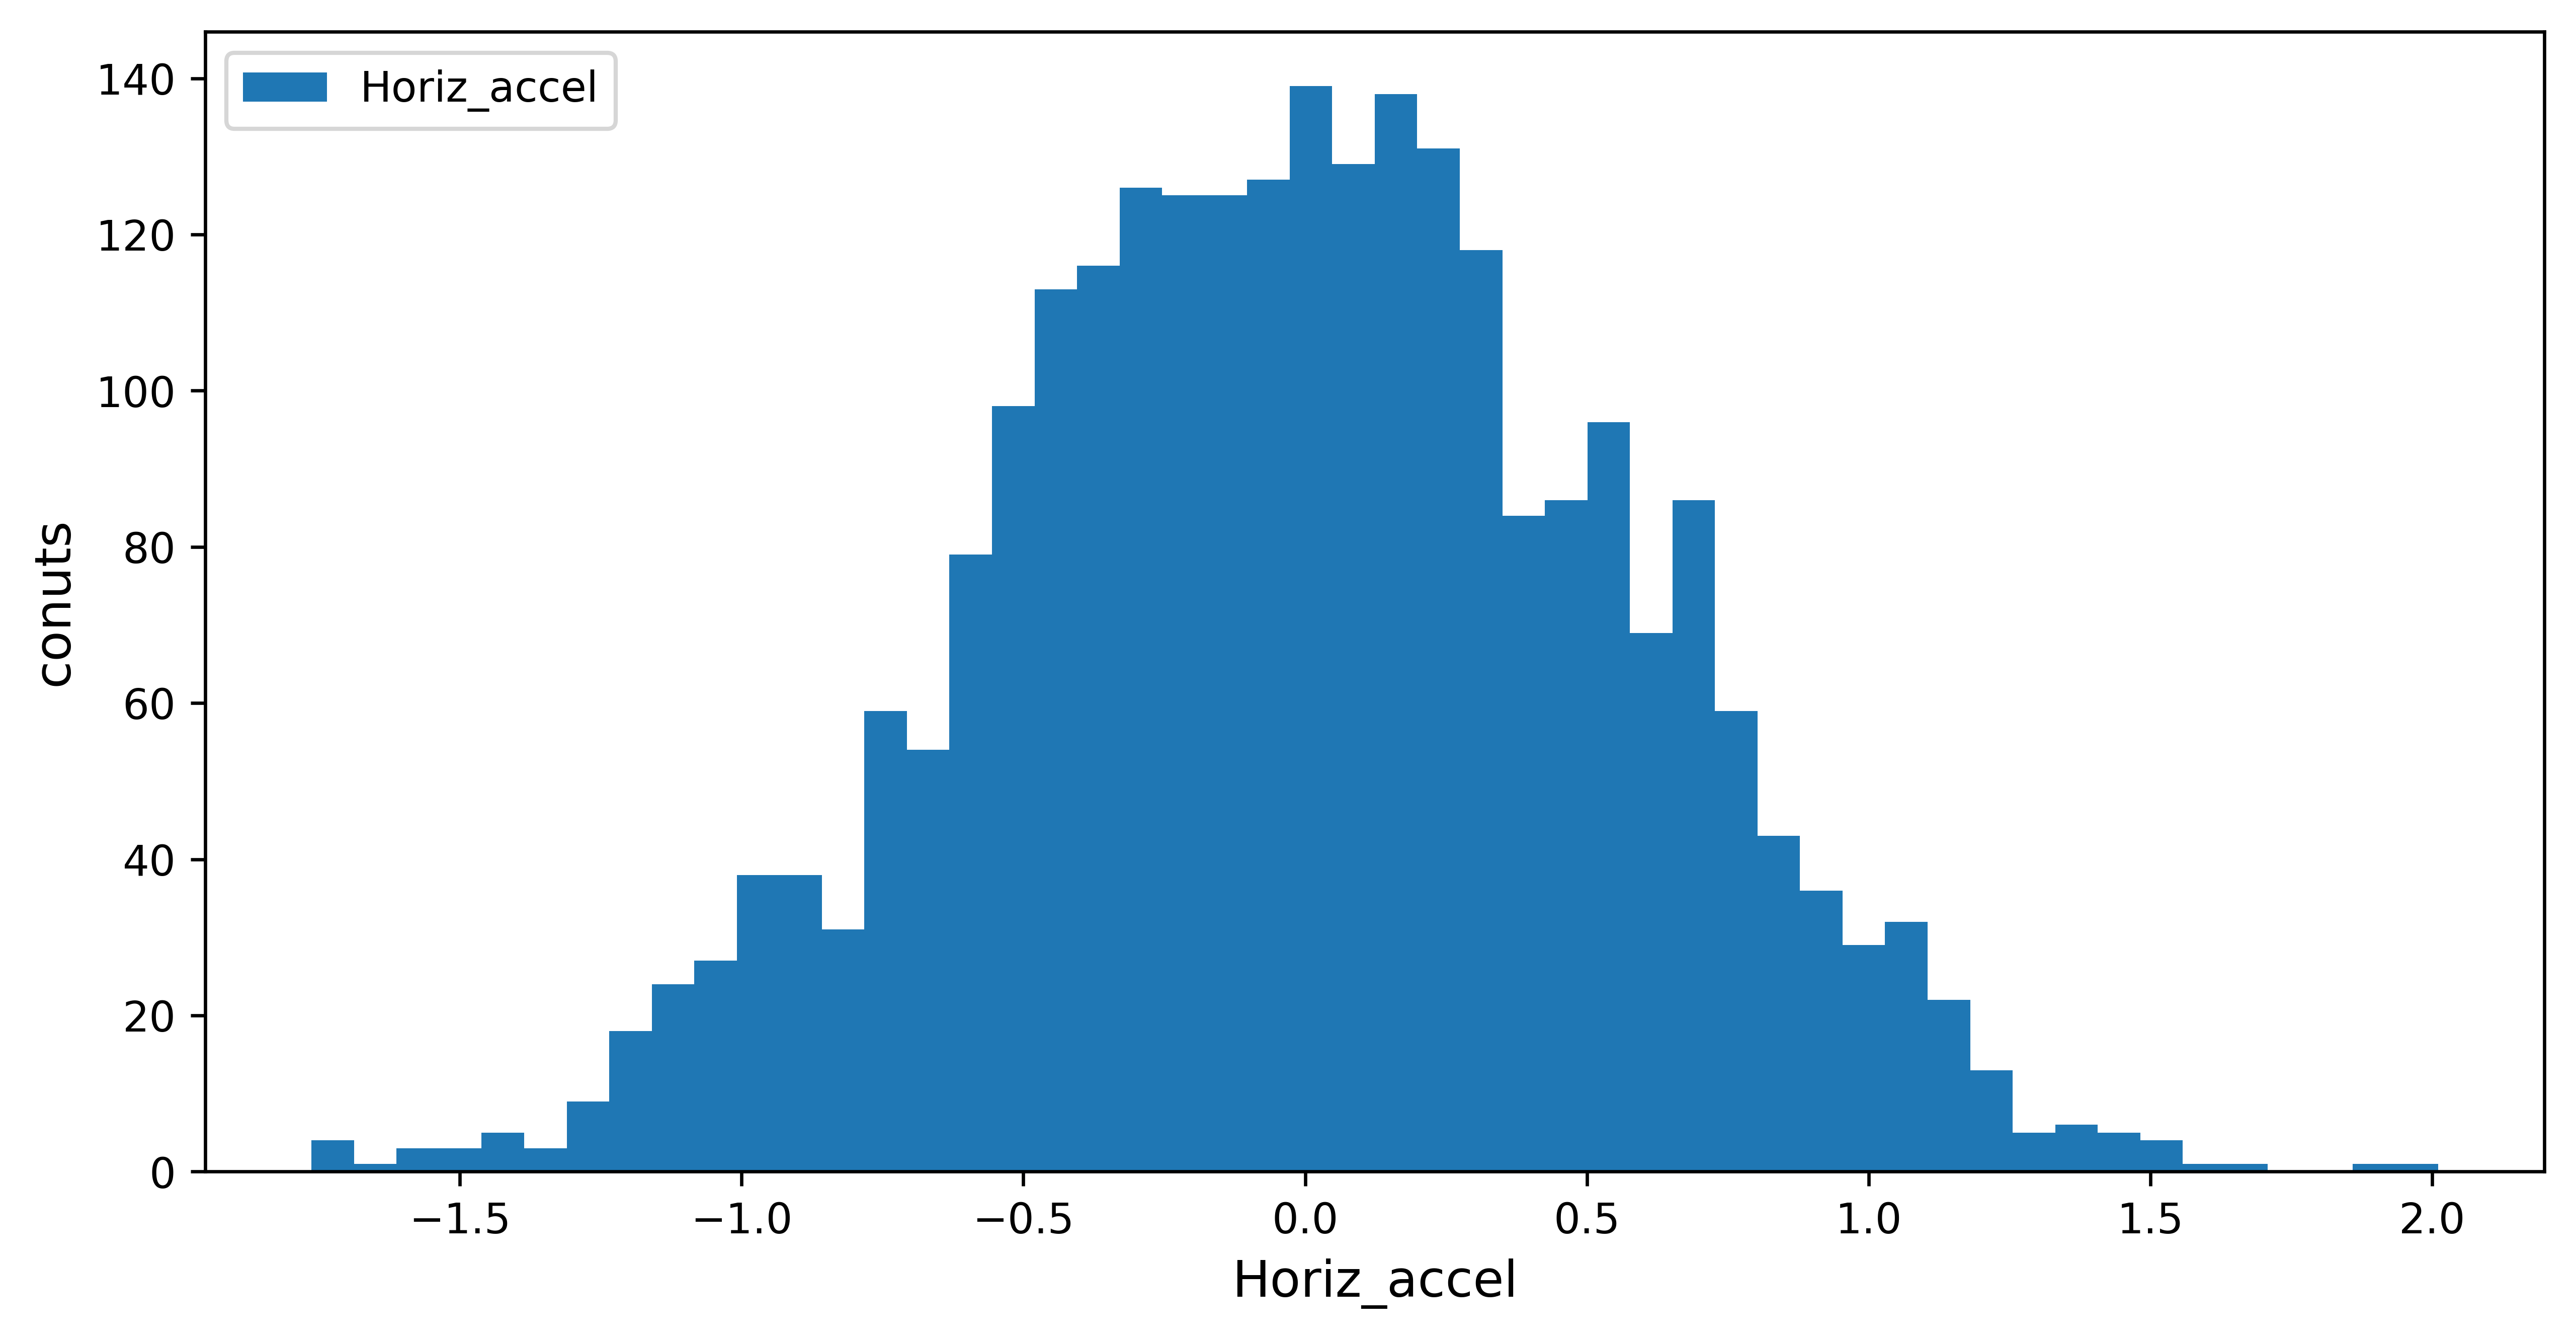

In [42]:
###修改上面程序，不同的bins大小。

fig_verify = plt.figure(figsize=(10,5),dpi=600)
#读取Horiz_accel数据并显示

##########bins=50,20
data.Horiz_accel.plot(kind='hist',bins=50)

#设置标签
plt.legend(loc='upper left')
#设置x轴坐标
plt.xlabel("Horiz_accel",fontsize=12)
#设置y轴坐标
plt.ylabel("conuts",fontsize=12)
#显示图像
plt.show()
#保存图像
fig_verify.savefig("acc002.png")

如下通过代码示例讲述Pandas库如何对于acc_00001.csv累加型直方图可视化显示

In [ ]:
#导入可视化图库
import matplotlib.pyplot as plt

fig_verify = plt.figure(figsize=(10,5),dpi=600)
#读取Horiz_accel数据并显示
data.Horiz_accel.plot(kind='hist',bins=200,cumulative=True)

#设置标签
plt.legend(loc='upper left')
#设置x轴坐标
plt.xlabel("Horiz_accel",fontsize=12)
#设置y轴坐标
plt.ylabel("cumulative conuts",fontsize=12)
#显示图像
plt.show()
#保存图像
fig_verify.savefig("acc003.png")

如下通过代码示例讲述Pandas库如何对于acc_00001.csv散点图可视化显示

In [ ]:
#导入可视化图库
import matplotlib.pyplot as plt

fig_verify = plt.figure(figsize=(10,5),dpi=600)
#读取Horiz_accel数据并显示
data.plot(kind='scatter', x='Horiz_accel', y='u-second', figsize=(10, 6), color='darkblue')

#设置x轴坐标
plt.xlabel("Horiz_accel",fontsize=12)
#设置y轴坐标
plt.ylabel("u-second",fontsize=12)
#显示图像
plt.show()
#保存图像
fig_verify.savefig("acc004.png")